In [45]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [12]:
data = pd.read_csv("C:/Users/aalpe/OneDrive/Masaüstü/NetflixOriginals.csv")
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [38]:
print(f"Columns: \n {data.columns} \n\n Data Types: \n {data.dtypes}")


Columns: 
 Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object') 

 Data Types: 
 Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [55]:
# Verinin içinde eksik var mı kontrol ediyoruz.
data.isna().sum()
data.isnull().sum()

# boş veri olsaydı doldurmak için aşağıdaki şekilde kullanacaktık.
# data.fillna(ortalamabirdeğer)

# tekrar eden veriyi de kontrol ediyoruz.
data.duplicated().sum()


0

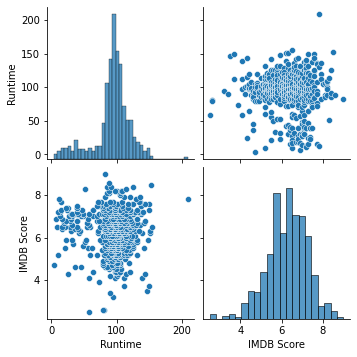

In [91]:
#pairplot kullanarak hızlıca sayısal verilerin analizine bakıyoruz.
sns.pairplot(data)

In [95]:
# Yayınlanma tarihini analizi kolaylaştırmak için to_datetime kullanarak çeviriyoruz ve yeni kolon ekliyoruz. YY-MM-DD
data["date_new"] = pd.to_datetime(data["Premiere"])
data.head()



,Title,Genre,Premiere,Runtime,IMDB Score,Language,date_new
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30


In [97]:
#Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur?

print(data.Runtime.mean())
#sayısal verilerin nasıl dağıldığını görnek için hızlı bir yöntem
print(data.describe())
data.sort_values("Runtime", ascending=False)

93.57705479452055
          Runtime  IMDB Score
count  584.000000  584.000000
mean    93.577055    6.271747
std     27.761683    0.979256
min      4.000000    2.500000
25%     86.000000    5.700000
50%     97.000000    6.350000
75%    108.000000    7.000000
max    209.000000    9.000000


,Title,Genre,Premiere,Runtime,IMDB Score,Language,date_new
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English,2019-11-27
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English,2020-06-12
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
247,Citation,Drama,"November 6, 2020",151,6.2,English,2020-11-06
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese,2019-10-11
...,...,...,...,...,...,...,...
498,Zion,Documentary,"August 10, 2018",11,7.2,English,2018-08-10
66,American Factory: A Conversation with the Obamas,Aftershow / Interview,"August 21, 2019",10,5.2,English,2019-08-21
325,Canvas,Animation / Short,"December 11, 2020",9,6.5,English,2020-12-11
417,Cops and Robbers,Animation / Short,"December 28, 2020",7,6.9,English,2020-12-28


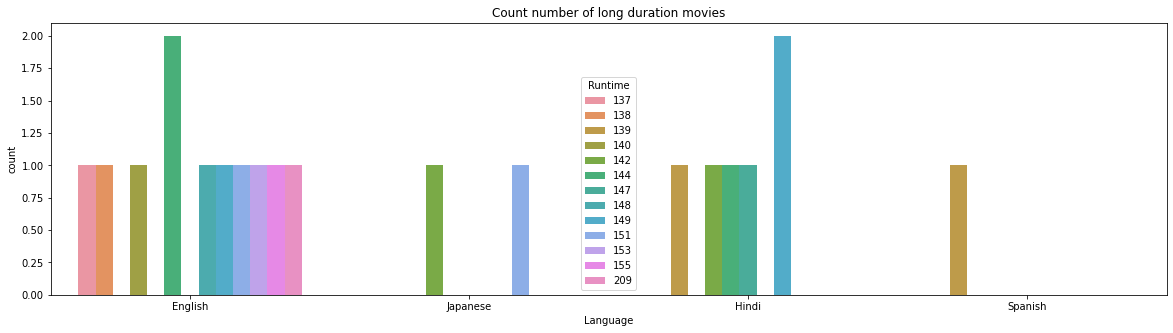

In [140]:
#En uzun filmleri aldık, dillerini uzunluklarına kırararak saydırdırdık. İngilizce en yoğun dil çıktı.
data1 = data.sort_values("Runtime", ascending=False).head(20)
plt.figure(figsize=(20,5))
plt.title("Count number of long duration movies")
sns.countplot(x="Language", data = data1, hue="Runtime")
plt.show()

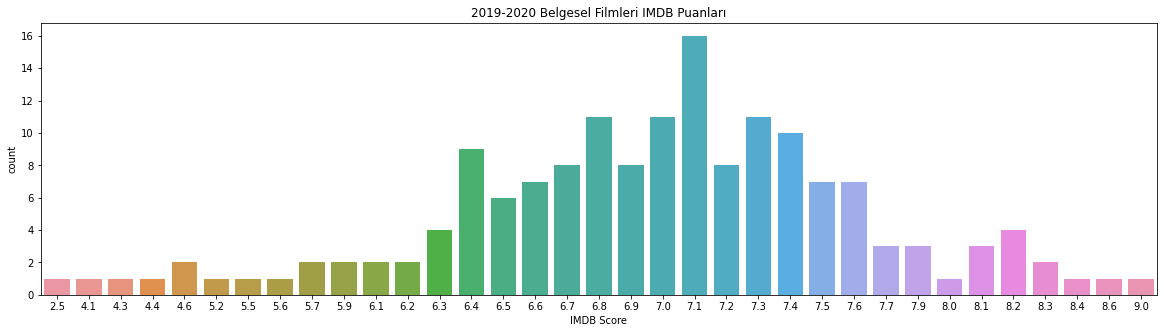

In [162]:
#2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

data2 = data[data["date_new"].between('2019-01-01','2020-06-01')]
data2 = data[data["Genre"] == "Documentary"]

plt.figure(figsize=(20,5))
plt.title("2019-2020 Belgesel Filmleri IMDB Puanları")
sns.countplot(x="IMDB Score", data = data2)
plt.show()


In [ ]:
#İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?